In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, accuracy_score, recall_score, precision_score, balanced_accuracy_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

#load data from CSV file
data = pd.read_csv("/Users/catherinebetancourt-lee/BMEN 415/fetal_health.csv.csv")

#Merging classification classes into binary 
data['fetal_health'] = data['fetal_health'].replace(1.0,0)
data['fetal_health'] = data['fetal_health'].replace(2.0,0)
data['fetal_health'] = data['fetal_health'].replace(3.0,1)

#Separate data and target variables
X = data.drop('fetal_health', axis = 1)
y = data['fetal_health']

#split model into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=142)

#Create Gaussian Naive Bayes classifier 
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)

#predictions
y_pred = gnb_classifier.predict(X_test)

#metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred)
print("F1 Score", f1)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)
recall = recall_score(y_test, y_pred)
print("Recall Score:", recall)
precision = precision_score(y_test, y_pred)
print("Precision Score:", precision)
auc = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

Accuracy: 0.9272300469483568
F1 Score 0.6265060240963857
Balanced Accuracy: 0.8432955791012058
Recall Score: 0.7428571428571429
Precision Score: 0.5416666666666666
AUC Score: 0.8432955791012057
Confusion matrix:
[[369  22]
 [  9  26]]


0.9272300469483568


/Users/catherinebetancourt-lee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


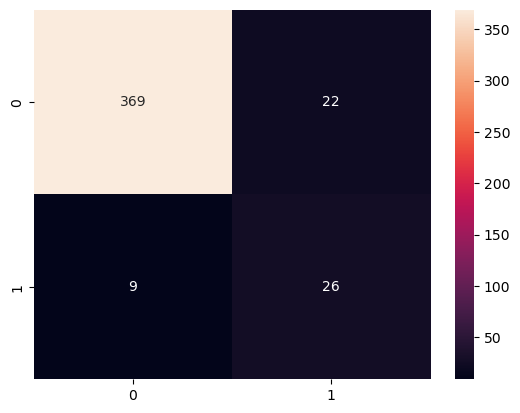

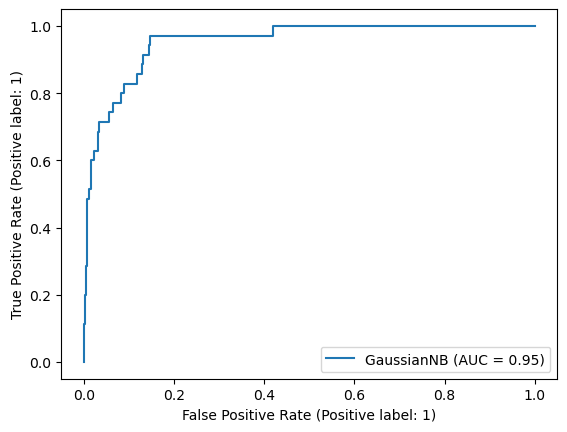

In [4]:
sns.heatmap(cm,annot=True, annot_kws={'size':10}, fmt='d')
print(accuracy_score(y_test, y_pred))

metrics.plot_roc_curve(gnb_classifier, X_test, y_test)
plt.show()